In [1]:
import torch
from torch import nn 

import torchvision 
from torchvision import datasets, models 
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt 

In [3]:

train_dataset = datasets.FashionMNIST(root='mnt/data/pao-academy/playground/mnist-dataset/data/', train=True, download=True, transform=ToTensor(), target_transform=None)
test_dataset = datasets.FashionMNIST(root='/mnt/data/pao-academy/playground/mnist-dataset/data/', train=False, download=True, transform=ToTensor())

100%|██████████| 26421880/26421880 [00:10<00:00, 2451875.46it/s]


Extracting /mnt/data/pao-academy/playground/mnist-dataset/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /mnt/data/pao-academy/playground/mnist-dataset/data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 180721.93it/s]


Extracting /mnt/data/pao-academy/playground/mnist-dataset/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /mnt/data/pao-academy/playground/mnist-dataset/data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1926074.61it/s]


Extracting /mnt/data/pao-academy/playground/mnist-dataset/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /mnt/data/pao-academy/playground/mnist-dataset/data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13503612.88it/s]

Extracting /mnt/data/pao-academy/playground/mnist-dataset/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /mnt/data/pao-academy/playground/mnist-dataset/data/FashionMNIST/raw



In [4]:
image, label = train_dataset[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
len(train_dataset.data), len(train_dataset.targets), len(test_dataset.data), len(test_dataset.targets)

(60000, 60000, 10000, 10000)

In [7]:
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape torch.Size([1, 28, 28])


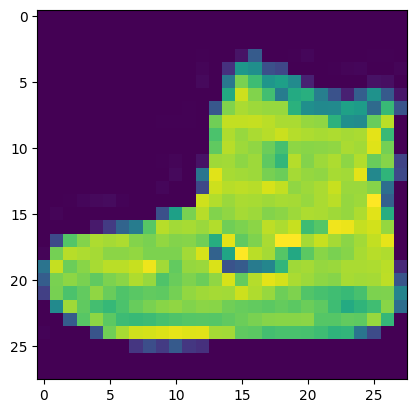

In [8]:
image, label = train_dataset[0]
print(f"Image shape {image.shape}")
plt.imshow(image.squeeze())

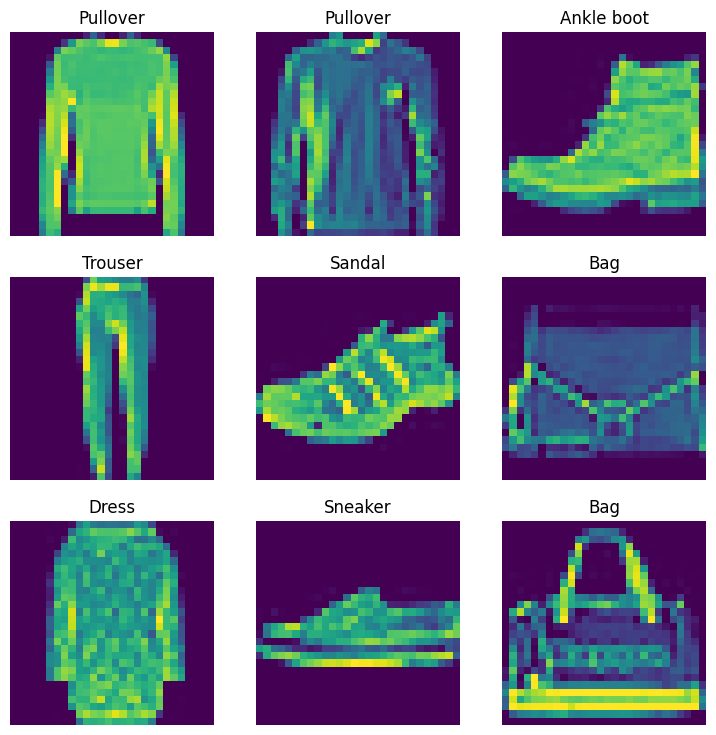

In [9]:
torch.manual_seed(1)

fig = plt.figure(figsize=(9,9))
rows, cols = 3, 3

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze())
    plt.title(class_names[label])
    plt.axis(False)

In [11]:
BATCH_SIZE = 32

from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Pullover')

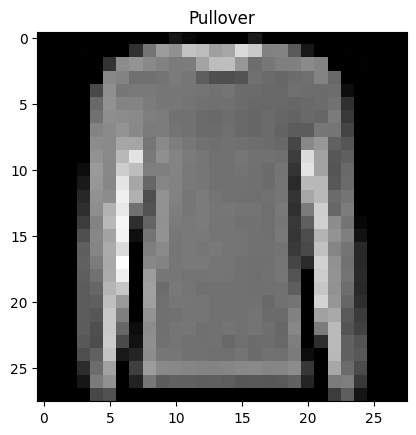

In [13]:
torch.manual_seed(0)
random_idx = torch.randint(0, len(train_features_batch,), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])

In [19]:
flatten = nn.Flatten()
x =  train_features_batch[0]

output = flatten(x)
print(f"Before flatten: {x.shape}")
print(f"After flatten : {output.shape}")

# print(x)
# print(output)

Before flatten: torch.Size([1, 28, 28])
After flatten : torch.Size([1, 784])


In [22]:
class FashionMNISTModelv0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)


In [23]:
torch.manual_seed(0)

model_0 = FashionMNISTModelv0(784, 10, len(class_names))
model_0.to("cpu")

FashionMNISTModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# Plotting results 
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(), cmap="gray")

    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label: 
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

In [ ]:
# Plotting confusion matrix
from tqdm.auto import tqdm

y_preds = []
model.eval()
with torch.inference_mode():
    for x, y in tqdm(test_dataloader, desc="Making predictions"):
        x, y = x.to(device), y.to(device)
        y_logit = model(x)

        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
    os.run(f"!pip install -q torchmetrics -U mlxtend") # not fixed command 
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mxltend.__version__}")

# plotting confusion matrix
from torchmetrics import ConfusionMatrix 
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)